In [ ]:
# Exploratory Data Analysis

# https://seaborn.pydata.org/tutorial/distributions.html
# https://www.datacamp.com/community/tutorials/wordcloud-python
# https://medium.com/@james_aka_yale/the-4-recommendation-engines-that-can-predict-your-movie-tastes-bbec857b8223
# https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python

# Data: http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [9]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

import matplotlib.pyplot as plt
% matplotlib inline

In [10]:
# Import the `pandas` library as `pd`
import pandas as pd


# Load in the data with `read_csv()`
ratings = pd.read_csv("./ml-latest-small/ratings.csv",
                     header=0, index_col=0)

#Big data set
#ratings = pd.read_csv("./ml-latest/ratings.csv",
#                     header=0, index_col=0)

tags = pd.read_csv("./ml-latest-small/tags.csv",
                     header=0, index_col=0)
# Big data set
#tags = pd.read_csv("./ml-latest/tags.csv",
#                     header=0, index_col=0)
# Load in the data with `read_csv()`
movies = pd.read_csv("./ml-latest-small/movies.csv",
                     header=0, index_col=0)
print(tags )

        movieId                     tag   timestamp
userId                                             
2         60756                   funny  1445714994
2         60756         Highly quotable  1445714996
2         60756            will ferrell  1445714992
2         89774            Boxing story  1445715207
2         89774                     MMA  1445715200
2         89774               Tom Hardy  1445715205
2        106782                   drugs  1445715054
2        106782       Leonardo DiCaprio  1445715051
2        106782         Martin Scorsese  1445715056
7         48516            way too long  1169687325
18          431               Al Pacino  1462138765
18          431                gangster  1462138749
18          431                   mafia  1462138755
18         1221               Al Pacino  1461699306
18         1221                   Mafia  1461699303
18         5995               holocaust  1455735472
18         5995              true story  1455735479
18        44

In [11]:
# Groupby by movie
movieId = ratings.groupby("movieId")


In [12]:
# Should we get rid of movies which were rated less than 20? 30? 50?
# Should we get rid of users which didn't rate enough movies? (20? find paper)
# For small data: max 329, min 1
# For big: max 97999, min 1
print(movieId.count().sort_values(by="rating",ascending=False))


         rating  timestamp
movieId                   
356         329        329
318         317        317
296         307        307
593         279        279
2571        278        278
260         251        251
480         238        238
110         237        237
589         224        224
527         220        220
2959        218        218
1           215        215
1196        211        211
50          204        204
2858        204        204
47          203        203
780         202        202
150         201        201
1198        200        200
4993        198        198
1210        196        196
858         192        192
457         190        190
592         189        189
5952        188        188
2028        188        188
7153        185        185
588         183        183
608         181        181
2762        179        179
...         ...        ...
57421         1          1
58492         1          1
57499         1          1
57502         1          1
5

In [14]:
#top 10 movies
movieId.mean().sort_values(by="rating",ascending=False).head(10)

,rating,timestamp
movieId,,
88448,5.0,1.315438e+09
100556,5.0,1.456151e+09
143031,5.0,1.520409e+09
143511,5.0,1.526207e+09
143559,5.0,1.520410e+09
6201,5.0,1.100120e+09
102217,5.0,1.443200e+09
102084,5.0,1.493422e+09
6192,5.0,1.063275e+09


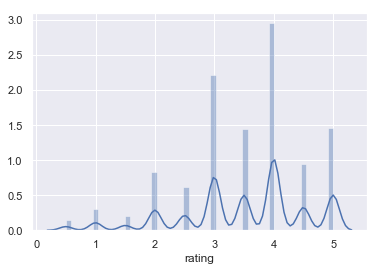

In [15]:
# Plotting univariate distributions
sns.set(color_codes=True)
sns.distplot(ratings["rating"]);

# Not a lot bad marks, people don't rate bad movie? or they rate movie if it is really really bad?
# they prefer whole rating (4.0 3.0) than 0.5 ?


In [7]:
ratings["rating"].describe()

count    2.775344e+07
mean     3.530445e+00
std      1.066353e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

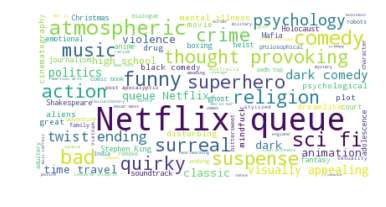

In [16]:
# Generating WordClouds for tags in Python
# Create and generate a word cloud image:
text = tags["tag"].str.cat(sep=', ')

wordcloud = WordCloud(background_color="white",max_words=100).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
# Save the image in the img folder:
wordcloud.to_file("./tag_WordClouds.png")